In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from geopy.geocoders import Nominatim
from shapely.geometry import Point

In [6]:
# Initialization
print(f'Beginning initialization...')

# Reading GeoJSON file
print('Reading GeoJSON file...')
boundaries = gpd.read_file('../../data_files/electoral_districts.geojson')
boundaries.sort_values(by=['ED_ID'])
print(f'GeoJSON file read')
print(f'Reading Population Information...')
population_information = pd.read_csv('../../data_files/population_information.csv')
for row in population_information.Statistic:
    if row != 'Population - 2016':
        population_information.drop(population_information[population_information.Statistic == row].index, inplace=True)
population_information.sort_values(by=['ED_ID'])
for i in range(len(population_information)):
    population_information.ED_ID.iloc[i] = str(population_information.ED_ID.iloc[i])
print(f'Population Information read')
print(f'Merging data...')
population_information = pd.merge(boundaries, population_information, on='ED_ID', how='outer')
print(f'Population data integrated.')

Beginning initialization...
Reading GeoJSON file...
GeoJSON file read
Reading Population Information...


/tmp/ipykernel_46068/1540264890.py:16: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  population_information.ED_ID.iloc[i] = str(population_information.ED_ID.iloc[i])
/tmp/ipykernel_46068/1540264890.py:16: SettingWithCopyWarning: 
A value is 

Population Information read
Merging data...
Population data integrated.


In [7]:
# Metres to Hectares
population_information = population_information.assign(
    Area_HA = [
        0.0001 * population_information.Shape__Area[i]
        for i in range(len(population_information)) 
    ]
)

In [12]:
# Creates new gdf with log of population density column

population_information_with_density = population_information.assign(
    density = [
        np.log2(population_information.VALUE[i] / population_information.Area_HA[i]) # Calculate abs of log of population density
        for i in range(len(population_information)) 
    ]
)

<Axes: title={'center': 'Population Density ($\\ln\\frac{P}{A}$)'}>

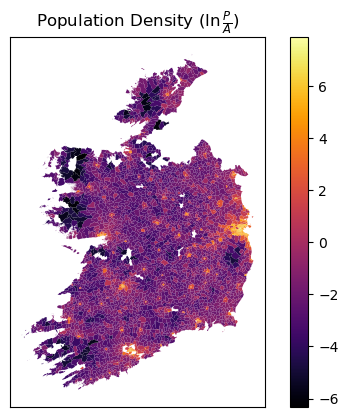

In [14]:
plt.figure()

ax = plt.subplot()

ax.set_title('Population Density ($\\ln\\frac{P}{A}$)')
ax.set_xticks([])
ax.set_yticks([])

population_information_with_density.plot(ax = ax, column='density', legend=True,  cmap='inferno')

In [37]:
final_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3455 entries, 0 to 3454
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   ED_ID               3455 non-null   object  
 1   ENGLISH             3455 non-null   object  
 2   GAEILGE             3441 non-null   object  
 3   CONTAE              3455 non-null   object  
 4   COUNTY              3455 non-null   object  
 5   PROVINCE            3455 non-null   object  
 6   GUID_x              3455 non-null   object  
 7   CENTROID_X          3455 non-null   float64 
 8   CENTROID_Y          3455 non-null   float64 
 9   AREA                3455 non-null   float64 
 10  ESRI_OID            3455 non-null   int64   
 11  Shape__Area         3455 non-null   float64 
 12  Shape__Length       3455 non-null   float64 
 13  geometry            3455 non-null   geometry
 14  CSOED_3409          3377 non-null   float64 
 15  Electoral_Division  3377 non-n

In [19]:
import copy

final_gdf = copy.deepcopy(population_information_with_density)


In [36]:
final_gdf = final_gdf.drop(columns=[
    "TLISTA1"
])

In [38]:
final_gdf.to_file("data_file.geojson", driver="GeoJSON")

In [2]:
data = gpd.read_file("data_file.geojson")

In [7]:
data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3455 entries, 0 to 3454
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   ED_ID               3455 non-null   object  
 1   ENGLISH             3455 non-null   object  
 2   GAEILGE             3441 non-null   object  
 3   CONTAE              3455 non-null   object  
 4   COUNTY              3455 non-null   object  
 5   PROVINCE            3455 non-null   object  
 6   GUID_x              3455 non-null   object  
 7   CENTROID_X          3455 non-null   float64 
 8   CENTROID_Y          3455 non-null   float64 
 9   AREA                3455 non-null   float64 
 10  ESRI_OID            3455 non-null   int64   
 11  Shape__Area         3455 non-null   float64 
 12  Shape__Length       3455 non-null   float64 
 13  CSOED_3409          3377 non-null   float64 
 14  Electoral_Division  3377 non-null   object  
 15  VALUE               3377 non-n

In [8]:
data.get_coordinates

<bound method GeoPandasBase.get_coordinates of        ED_ID       ENGLISH                 GAEILGE          CONTAE    COUNTY  \
0     107001     ABBEYLEIX          Baile Briotáis           Laois     LAOIS   
1     107002     AGHMACART       Baile Uí Bhróithe           Laois     LAOIS   
2     107003       ARDERIN      Baile Uí Chearúill           Laois     LAOIS   
3     107004       ARDOUGH          An Baile Fionn           Laois     LAOIS   
4     107005        ARLESS       Baile Uí Liatháin           Laois     LAOIS   
...      ...           ...                     ...             ...       ...   
3450   97109        ULLARD                  Iolard  Cill Chainnigh  KILKENNY   
3451   97110         ULLID                  Iollad  Cill Chainnigh  KILKENNY   
3452   97111    URLINGFORD         Áth na nUrlainn  Cill Chainnigh  KILKENNY   
3453   97112   WHITECHURCH        An Teampall Geal  Cill Chainnigh  KILKENNY   
3454   97113  WOOLENGRANGE  Gráinseach na hOlainne  Cill Chainnigh  KILKE

In [43]:
def get_coords_from_address(address: str) -> tuple | None:
    """
    Get the coordinates of a location from an address

    Parameters:
        address (str): The address to geocode 
    
    Returns:
        tuple | None: The coordinates of the address if found, None otherwise
    """
    # Initialize the geocoder
    geolocator = Nominatim(user_agent="my_app")

    # Geocode the address
    location = geolocator.geocode(address)

    # Print the coordinates
    if location:
        return(location.longitude, location.latitude)
    else:
        print("Location not found")
        return None
    


In [72]:
post_primary = gpd.read_file("post_primary_list.csv")
post_primary["geometry"] = [
    Point(lon, lat) for lon,lat in zip(post_primary["School Longitude"], post_primary["School Latitude"])
]
post_primary["Total"] = post_primary["Total 2023-2024"]
post_primary.drop(columns=["Total 2023-2024"], inplace=True, axis=1)

primary_mainstream = gpd.read_file("primary_mainstream.csv")
primary_mainstream.columns = primary_mainstream.iloc[0]
primary_mainstream = primary_mainstream.drop(primary_mainstream.index[0])
primary_mainstream = primary_mainstream.drop(primary_mainstream.index[-1])
# primary_mainstream["geometry"] = [
#     Point(get_coords_from_address(address)) for address in primary_mainstream["Address"]
# ]
primary_mainstream["geometry"] = [
    Point(float(lon), float(lat)) for lon,lat in zip(primary_mainstream["School Longitude"], primary_mainstream["School Latitude"])
]
primary_mainstream["Total"] = [float(m) + float(f) for m,f in zip(primary_mainstream['Male'], primary_mainstream['Female'])]

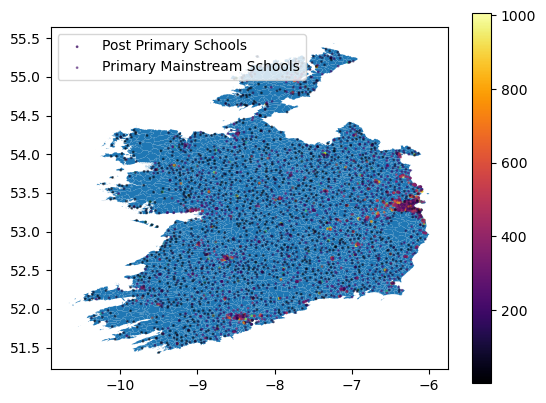

In [81]:
post_primary.set_crs(epsg=4326, inplace=True)
data.set_crs(epsg=4326, inplace=True)

ax = data.plot()
post_primary.plot(ax=ax, cmap = "viridis", markersize=1, label = "Post Primary Schools", alpha=0.75, column = "Total", legend=True)
primary_mainstream.plot(ax=ax, cmap = "inferno", markersize=1, label = "Primary Mainstream Schools", alpha=0.5, column = "Total", legend=True)

ax.legend()

In [74]:
post_primary["Total"]

0      1,260
1        213
2      1,048
3        206
4        501
       ...  
717      320
718      988
719      783
720    1,004
721      713
Name: Total, Length: 722, dtype: object

In [73]:
primary_mainstream["Total"]

1       200.0
2        78.0
3       195.0
4       308.0
5       142.0
        ...  
3085     34.0
3086    635.0
3087    411.0
3088     92.0
3089     76.0
Name: Total, Length: 3089, dtype: float64